## Explorando los datos de la tabla de MNIST

In [2]:
import numpy as np
# Nos va a servir para funciones que contengan elementos algebraicos

import pandas as pd

df_train_total = pd.read_csv("../dataset/fashion-mnist_train.csv")
df_train_total.shape

(60000, 785)

In [3]:
df_train_total[:20] #Veamos como son las primeras 20 filas del dataframe

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


### Creo array que en la posicion i tiene asignada la prenda asociada a dicho valor

In [4]:
prendas = np.array(["Remera/Top", "Pantalon", "Pullover", "Vestido", "Saco", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"])


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [5]:
df_train = df_train_total[:5000]

In [6]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

print(X.shape, y.shape)

(5000, 784) (5000, 1)


Supuestamente es un/a Bota


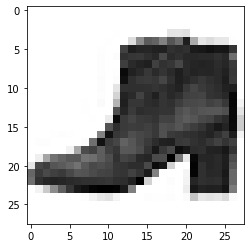

In [7]:
import matplotlib.pyplot as plt

num = 117

print(f"Supuestamente es un/a {prendas[int(y[num])]}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [8]:
df_train["label"].value_counts(normalize=True)

7    0.1034
3    0.1028
6    0.1016
0    0.1004
4    0.1002
1    0.1000
2    0.0988
9    0.0988
5    0.0978
8    0.0962
Name: label, dtype: float64

#### No, no hay la misma cantidad por cada prenda

### Conjunto de Development

In [54]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
print(limit) 

Ahora tengo 4000 instancias de entrenamiento y 1000 de validación
4000


### Uso los clasificadores de "Scikit Learn" (kNN, PCA, t-SNE, UMAP)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [14]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.745
CPU times: user 528 ms, sys: 236 ms, total: 764 ms
Wall time: 165 ms


### Variacion Tamanio de la muestra

In [55]:
def muestra(cant):
    df_train_custom = df_train_total.sample(cant)
    X_custom = df_train_custom[df_train_custom.columns[1:]].values
    y_custom = df_train_custom["label"].values
    
    return df_train_custom, X_custom, y_custom

In [56]:
df_train, X_train, y_train = muestra(10000)

In [58]:
print(f"Ahora tengo {len(X_train)} instancias de entrenamiento")

Ahora tengo 10000 instancias de entrenamiento


### Estudios KFolds

#### K-Folds: kNN

In [16]:
def KFoldKNN(k, X, y):
    kfold = KFold(10)
    accuracyArr = []
    
    for i, fold in kfold.split(X):
        
        X_train = X[i]
        y_train = y[i]
        
        X_test = X[fold]
        y_test = y[fold]
        
        # Metodo kNN
        kNN = KNeighborsClassifier(k)
        
        kNN.fit(X_train, y_train)

        y_pred = kNN.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        accuracyArr.append(acc)
        
    accuracyArr = np.asarray(accuracyArr)
    mediaAccuracy = np.mean(accuracyArr)
    
    return mediaAccuracy

#### (estudio k de vecinos)

In [26]:
import time
def estudio_k(k, X, y):
    accuracyList = []
    timeList = []
    for i in range(1, k):
        start = time.time()
        mediaAccuracy = KFoldKNN(int(i), X, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)
    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList)  
    return accuracyList, timeList

#### K-Folds: PCA (estudio alfa PCA)

In [37]:
def estudio_alfa_PCA(a, k, X, y):
    accuracyList = []
    timeList = []
    for i in range(1, a):
        # Realizo redimension
        myPCA = PCA(n_components=int(i))
        myPCA.fit(X)
        X_PCA_train = myPCA.transform(X)
        
        # Aplico kNN como siempre
        start = time.time()
        mediaAccuracy = KFoldKNN(k, X_PCA_train, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)

    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList) 
    return accuracyList, timeList

#### K-Folds: kNN con PCA (estudio vecino con alfa determinado)

In [69]:
def estudio_k_PCA(k, a, X, y):
    accuracyList = []
    timeList = []   
    myPCA = PCA(n_components=int(a))
    myPCA.fit(X)
    X_PCA_train = myPCA.transform(X)
    for i in range(1, k):
        start = time.time()
        mediaAccuracy = KFoldKNN(int(i), X_PCA_train, y)
        accuracyList.append(mediaAccuracy)
        end = time.time()
        timeList.append(end-start)
        
    accuracyList = np.asarray(accuracyList)
    timeList = np.asarray(timeList)    
    return accuracyList, timeList

#### K-Folds: t-SNE

Componentes 

In [64]:
def estudio_componentes_TSNE(a, k, X, y):
    accuracyList = []
    for i in range(1, a):
        # Realizo redimension
        myTSNE = TSNE(n_components=int(i))
        X_TSNE_train = myTSNE.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_TSNE_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

Perplexity

In [23]:
def estudio_perplexity_TSNE(k, a, n, X, y):
    accuracyList = []
    for i in range(1, n):
        # Realizo redimension con neuvas perplexities
        myTSNE = TSNE(n_components=int(a), perplexity=int(i))
        X_TSNE_train = myTSNE.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_TSNE_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

Number of Iterations

In [24]:
def estudio_iterations_TSNE(k, a, n, X, y):
    accuracyList = []
    for i in range(1, n):
        # Realizo redimension con nuevas iteraciones
        myTSNE = TSNE(n_components=int(a), n_iter=int(i))
        X_TSNE_train = myTSNE.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_TSNE_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

#### K-Folds: UMAP

Componentes

In [19]:
def estudio_componentes_UMAP(a, k, X, y):
    accuracyList = []
    for i in range(1, a):
        # Realizo redimension
        UMAP = umap.UMAP(n_components=int(i))
        X_UMAP_train = UMAP.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_UMAP_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

Minimum Distance

In [134]:
def estudio_min_dist_UMAP(k, a, n, X, y):
    accuracyList = []
    distList = np.linspace(0.1,1,n)
    for i in range(0, distList.size):
        # Realizo redimension con distinta distancia minima
        UMAP = umap.UMAP(n_components=int(a), min_dist=distList[int(i)])
        X_UMAP_train = UMAP.fit_transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_UMAP_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

### Testeo funciones

#### Estudio k

In [59]:
%%time
accuracyKNN100, timeKNN100 = estudio_k(100, X_train, y_train)

CPU times: user 13min 24s, sys: 6min 17s, total: 19min 41s
Wall time: 4min 22s


In [60]:
print(accuracyKNN100)

[0.8086 0.8051 0.8141 0.8156 0.8167 0.8187 0.8197 0.8168 0.8156 0.812
 0.8112 0.8118 0.8108 0.811  0.8085 0.8081 0.8066 0.8069 0.8058 0.8056
 0.8063 0.8066 0.8061 0.8045 0.8034 0.8024 0.8028 0.8021 0.8016 0.8007
 0.8004 0.8004 0.7992 0.7986 0.7999 0.7982 0.7974 0.7979 0.7957 0.7966
 0.7952 0.7946 0.7924 0.7946 0.7919 0.7927 0.7905 0.7909 0.7902 0.7891
 0.7907 0.7895 0.7891 0.7899 0.7896 0.7897 0.7883 0.7884 0.7873 0.787
 0.7863 0.7865 0.7853 0.7864 0.7855 0.7851 0.7843 0.7846 0.7847 0.7856
 0.784  0.784  0.783  0.7828 0.7815 0.7825 0.7818 0.7821 0.7818 0.7814
 0.7813 0.7804 0.7811 0.7809 0.7798 0.7795 0.7791 0.7791 0.7787 0.7779
 0.7772 0.7776 0.7775 0.7782 0.7775 0.778  0.7776 0.7776 0.777 ]


In [61]:
print(timeKNN100)

[2.05540109 2.09175944 2.26785874 2.64335585 2.60453844 2.59541488
 2.58062744 2.48309612 2.4923172  2.51747012 2.55222011 2.52152133
 2.53175092 2.59400606 2.69860387 2.72858047 3.34368873 3.154737
 2.84832025 2.86469674 2.60918331 2.86906314 2.75165296 2.87972784
 2.90433669 2.5943346  2.55312967 2.91482496 2.56612444 2.63067222
 2.69954395 2.58027053 2.64982963 2.68302727 2.54526949 2.51558065
 2.53562307 2.5904572  2.58003354 2.575068   2.67075396 2.54456711
 2.65910792 2.54782653 2.5626018  2.72236896 2.65389633 2.55982423
 2.64943123 2.68717265 2.60715604 2.60593343 2.65527868 2.75256729
 2.71629167 2.74695492 2.9135251  2.75355005 2.69842005 2.82056451
 2.86890984 2.74937248 2.79301167 2.83425832 2.64733768 2.64232802
 2.59819341 2.62215972 2.57053232 2.58144307 2.62011886 2.5918963
 2.63617706 2.68068671 2.61805654 2.62537646 2.60207462 2.60373425
 2.62701082 2.65513515 2.59374523 2.65429521 2.63808632 2.68266869
 2.62035704 2.62697554 2.61406565 2.5931499  2.65902591 2.5621571

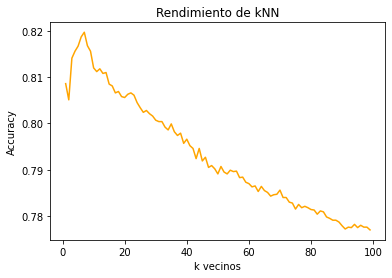

In [62]:
plt.title("Rendimiento de kNN")
plt.plot(range(1, 100), accuracyKNN100, color="orange")
plt.xlabel("k vecinos")
plt.ylabel("Accuracy")
plt.show()

k con maximo rendimiento

In [63]:
max_knn = max(accuracyKNN100)
maxKNN100 = np.where(accuracyKNN100 == max_knn)[0][0] + 1
print(f'k con maximo rendimiento: {maxKNN100}')

k con maximo rendimiento: 7


#### Estudio de alfa

In [64]:
%%time
accuracyAlpha150, timeAlpha150 = estudio_alfa_PCA(150, maxKNN100, X_train, y_train)

CPU times: user 17min 15s, sys: 11min 41s, total: 28min 56s
Wall time: 5min 37s


In [65]:
print (accuracyAlpha150)

[0.2504 0.508  0.6162 0.6887 0.7263 0.7508 0.7595 0.7643 0.7736 0.7863
 0.7928 0.7973 0.8013 0.8015 0.8066 0.8067 0.8125 0.8145 0.8147 0.8157
 0.8182 0.8193 0.8206 0.82   0.8215 0.8213 0.8219 0.8217 0.8223 0.8225
 0.8243 0.8241 0.8244 0.824  0.8252 0.8248 0.8252 0.8239 0.8256 0.8259
 0.8257 0.8253 0.8255 0.8248 0.8262 0.8253 0.8256 0.8243 0.8235 0.8248
 0.8247 0.8254 0.8253 0.8256 0.8255 0.8257 0.8253 0.8253 0.8251 0.825
 0.8257 0.8262 0.8275 0.8275 0.8274 0.8273 0.8279 0.8284 0.8281 0.8276
 0.8274 0.8279 0.8283 0.8284 0.8272 0.8274 0.8281 0.8267 0.8258 0.8255
 0.8268 0.8266 0.8267 0.8268 0.8284 0.8278 0.8269 0.8279 0.8276 0.8281
 0.8283 0.8282 0.8281 0.8279 0.8274 0.8278 0.8276 0.8283 0.8273 0.8285
 0.8269 0.8272 0.8274 0.8288 0.8278 0.8273 0.8285 0.8294 0.829  0.8283
 0.8287 0.8292 0.8295 0.8302 0.8293 0.8299 0.8291 0.8293 0.8294 0.8296
 0.8281 0.8281 0.8292 0.8288 0.8299 0.8297 0.8293 0.8285 0.8293 0.8292
 0.8288 0.8293 0.8293 0.8288 0.8285 0.8289 0.8287 0.828  0.8282 0.8276
 0.8295

In [66]:
print (timeAlpha150)

[0.24414468 0.2705152  0.27976131 0.3035779  0.32211781 0.34840751
 0.38415647 0.41931844 0.43483043 0.45832872 0.47970462 0.53207707
 0.5506556  0.58899498 0.61873198 1.60368061 1.59357357 1.59083962
 1.62038183 1.61051178 1.63076973 1.61143422 1.63949394 1.60136342
 1.63188195 1.58657503 1.60963035 1.59789348 1.58548069 1.57290292
 1.59965777 1.59589171 1.5865159  1.59197569 1.57926822 1.57958865
 1.57554531 1.57834411 1.5757525  1.58080602 1.60720873 1.60660911
 1.5889914  1.66367698 1.60585642 1.67575431 1.60526967 1.64008737
 1.60382438 1.61045909 1.6770277  1.62277484 1.61595321 1.60310125
 1.60385799 1.63124061 1.67383313 1.66271234 1.61936617 1.63304758
 1.59684157 1.60606575 1.60685205 1.58205748 1.64395118 1.5945003
 1.59302831 1.59799242 1.58947587 1.58358002 1.64152312 1.6414535
 1.59887815 1.58517551 1.5885365  1.60563755 1.62755203 1.58864903
 1.6087451  1.60006404 1.64942265 1.60873318 1.59487438 1.60574651
 1.60466552 1.59105992 1.59464717 1.6034615  1.65078735 1.605485

In [67]:
max_PCA = max(accuracyAlpha150)
maxAlpha150 = np.where(accuracyAlpha150 == max_PCA)[0][0] + 1
print(f'alfa con maximo rendimiento: {maxAlpha150}')

alfa con maximo rendimiento: 114


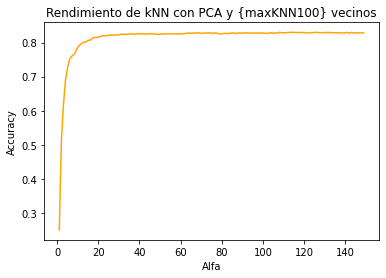

In [68]:
plt.title("Rendimiento de kNN con PCA y {maxKNN100} vecinos")
plt.plot(range(1, 150), accuracyAlpha150, color="orange")
plt.xlabel("Alfa")
plt.ylabel("Accuracy")
plt.show()

#### kNN con alfa elegido

In [72]:
%%time
a100_kNN_PCA, time100_kNN_PCA = estudio_k_PCA(100, maxAlpha150, X_train, y_train)

CPU times: user 7min 25s, sys: 5min 49s, total: 13min 14s
Wall time: 2min 45s


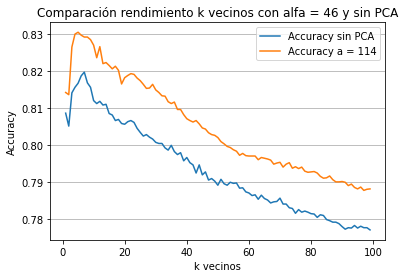

NameError: name 'pyplot' is not defined

In [73]:
rango = range(1, 100)
plt.plot(rango, accuracyKNN100, label='Accuracy sin PCA')

plt.plot(rango, a100_kNN_PCA, label=f'Accuracy a = {maxAlpha150}')


plt.legend(loc='best')
plt.title(f"Comparación rendimiento k vecinos con alfa = {maxAlpha100} y sin PCA")
plt.grid(axis='y')
plt.xlabel("k vecinos")
plt.ylabel("Accuracy")
plt.show()

# show the plot
pyplot.show()

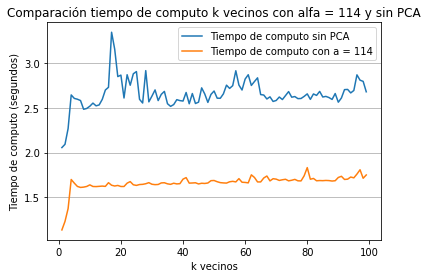

NameError: name 'pyplot' is not defined

In [76]:
rango = range(1, 100)
plt.plot(rango, timeKNN100, label='Tiempo de computo sin PCA')

plt.plot(rango, time100_kNN_PCA, label=f'Tiempo de computo con a = {maxAlpha150}')


plt.legend(loc='best')
plt.title(f"Comparación tiempo de computo k vecinos con alfa = {maxAlpha150} y sin PCA")
plt.grid(axis='y')
plt.xlabel("k vecinos")
plt.ylabel("Tiempo de computo (segundos)")
plt.show()

# show the plot
pyplot.show()

In [75]:
max_knn_pca = max(a100_kNN_PCA)
maxKNNPCA100 = np.where(a100_kNN_PCA == max_knn_pca)[0][0] + 1
print(f'k con maximo rendimiento: {maxKNNPCA100}')

k con maximo rendimiento: 5


#### Estudio componentes tsne

In [130]:
%%time
accuracyTSNE4 = estudio_componentes_TSNE(4, maxKNN100, X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tincho/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.p

CPU times: user 3min 3s, sys: 1.88 s, total: 3min 4s
Wall time: 32.8 s


/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [1]:
print(accuracyTSNE4)

NameError: name 'accuracyTSNE4' is not defined

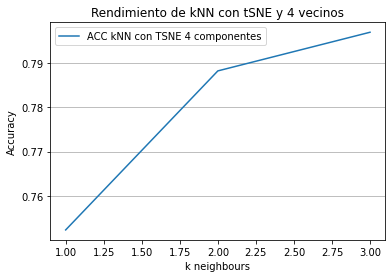

NameError: name 'pyplot' is not defined

In [132]:
rango = range(1, 4)
plt.plot(rango, accuracyTSNE4, label='ACC kNN con TSNE 4 componentes')

plt.legend(loc='best')
plt.title("Rendimiento de kNN con tSNE y 4 vecinos")
plt.grid(axis='y')
plt.xlabel("k neighbours")
plt.ylabel("Accuracy")
plt.show()

# show the plot
pyplot.show()

In [ ]:
max_tsne_n = max(accuracyTSNE4)
maxTSNE4 = np.where(accuracyTSNE4 == max_tsne_n)[0][0] + 1
print(f'k con maximo rendimiento: {maxTSNE4}')

#### Estudio Perplexity TSNE

In [137]:
%%time
accuracyPerplexity = estudio_perplexity_TSNE(maxKNN100, maxTSNE4, 50, X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tincho/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.p

CPU times: user 1h 30min 31s, sys: 24.5 s, total: 1h 30min 56s
Wall time: 15min 47s


/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [140]:
print(accuracyPerplexity)

[0.66325 0.77725 0.78125 0.7845  0.7825  0.78425 0.785   0.785   0.78925
 0.79225 0.79175 0.79275 0.7905  0.797   0.797   0.79675 0.79525 0.79475
 0.79625 0.79375 0.798   0.797   0.7975  0.7975  0.7985  0.795   0.798
 0.79525 0.798   0.793   0.798   0.795   0.79475 0.79525 0.79425 0.7955
 0.79925 0.79725 0.796   0.79625 0.796   0.79625 0.79425 0.79325 0.793
 0.79    0.79125 0.79175 0.789  ]


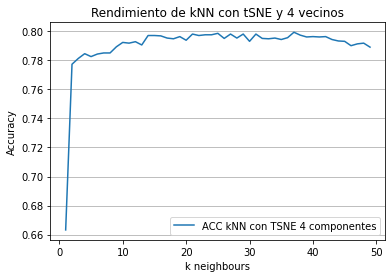

NameError: name 'pyplot' is not defined

In [139]:
rango = range(1, 50)
plt.plot(rango, accuracyPerplexity, label='ACC kNN con TSNE 4 componentes')

plt.legend(loc='best')
plt.title("Rendimiento de kNN con tSNE y 4 vecinos")
plt.grid(axis='y')
plt.xlabel("k neighbours")
plt.ylabel("Accuracy")
plt.show()

# show the plot
pyplot.show()

In [138]:
max_tsne_perplexity = max(accuracyPerplexity)
maxTSNEPerplexity50 = np.where(accuracyPerplexity == max_tsne_perplexity)[0][0] + 1
print(f'k con maximo rendimiento: {maxTSNEPerplexity50}')

k con maximo rendimiento: 37


#### Estudo componentes UMAP

In [35]:
%%time
accuracyUMAP50 = estudio_componentes_UMAP(50, maxKNN100, X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

CPU times: user 3min 49s, sys: 2.7 s, total: 3min 51s
Wall time: 1min 44s


/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [36]:
print(accuracyUMAP50)

[0.643   0.698   0.73725 0.73575 0.74525 0.7465  0.7465  0.74025 0.74275]


In [ ]:
rango = range(1, 50)
plt.plot(rango, accuracyUMAP50, label='ACC kNN con TSNE 4 componentes')

plt.legend(loc='best')
plt.title("Rendimiento de kNN con tSNE y 4 vecinos")
plt.grid(axis='y')
plt.xlabel("k neighbours")
plt.ylabel("Accuracy")
plt.show()

# show the plot
pyplot.show()

In [ ]:
max_umap_n = max(accuracyUMAP50)
maxUMAP50 = np.where(accuracyUMAP50 == max_umap_n)[0][0] + 1
print(f'n componentes con maximo rendimiento: {maxUMAP50}')

#### Estudo Maxima Distancia UMAP

In [53]:
accuracyDistUMAP = estudio_min_dist_UMAP(maxKNN100, maxUMAP50, 20, X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [54]:
print(accuracyDistUMAP)

[0.74375 0.7455  0.74525 0.744   0.748  ]


In [51]:
print(np.linspace(0.1,1,10))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


CPU times: user 12.7 ms, sys: 9 µs, total: 12.7 ms
Wall time: 11.5 ms


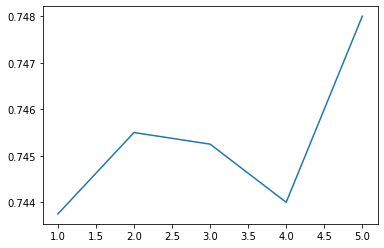

In [57]:
%%time
rango = range(1, 20)
plt.plot(rango, accuracyDistUMAP, label='ACC a = 20')

In [ ]:
max_umap_dist = max(accuracyDistUMAP)
maxUMAPDist20 = np.where(accuracyDistUMAP == max_umap_dist)[0][0] + 1
print(f'minima distancia con maximo rendimiento: {maxUMAPDist20}')

## Elijo mejores resultados de accuracy para kNN solo, PCA, t-SNE y UMAP para varias muestras y checkeo su tiempo de ejecucion

### Estudio muestras

In [94]:
# No se por que el kernel se muere cuando hago esta funcion
def muestra(cant):
    df_train_custom = df_train_total.sample(cant)
    X_custom = df_train_custom[df_train_custom.columns[1:]].values
    y_custom = df_train_custom["label"].values
    
    return df_train_custom, X_custom, y_custom

M = 1000

In [98]:
%%time

df_train_1000, X_1000, y_1000 = muestra(1000)
accuracyI = estudio_k_PCA(50, 20, X_1000, y_1000)

CPU times: user 9.62 s, sys: 5.33 s, total: 14.9 s
Wall time: 2.61 s


M = 2500

In [101]:
%%time

df_train_2500, X_2500, y_2500 = muestra(2500)
accuracyII = estudio_k_PCA(50, 20, X_2500, y_2500)

CPU times: user 27.4 s, sys: 16.5 s, total: 43.8 s
Wall time: 7.53 s


M = 5000

In [102]:
%%time

df_train_5000, X_5000, y_5000 = muestra(5000)
accuracyIII = estudio_k_PCA(50, 20, X_5000, y_5000)

CPU times: user 1min 19s, sys: 44.9 s, total: 2min 4s
Wall time: 22.5 s


M = 10000

In [ ]:
%%time

df_train_10000, X_10000, y_10000 = muestra(10000)
accuracyIV = estudio_k_PCA(50, 20, X_10000, y_10000)

CPU times: user 3min 36s, sys: 2min 54s, total: 6min 30s
Wall time: 1min 21s


#### Grafico todos los tipos de muestra para ver en que se diferencia su performance 

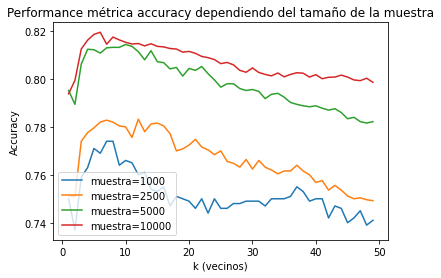

<Figure size 432x288 with 0 Axes>

In [ ]:
rangoMuestra = range(1, 50)
plt.plot(rangoMuestra, accuracyI, label='muestra=1000')
plt.plot(rangoMuestra, accuracyII, label='muestra=2500')
plt.plot(rangoMuestra, accuracyIII, label='muestra=5000')
plt.plot(rangoMuestra, accuracyIV, label='muestra=10000')
plt.xlabel("k (vecinos)")
plt.ylabel("Accuracy")
#plt.xticks(rangoMuestra)
plt.title("Performance métrica accuracy dependiendo del tamaño de la muestra")
leg = plt.legend(loc='lower left')
plt.show()
plt.savefig("Imagenes/muestra.png")

### Best kNN solo

### Best kNN con PCA

### Best kNN con t-SNE

### Best kNN con UMAP